### Project Codename: Skeleton - HackaTUM 2022
In this notebook we provide our PoC code for our submission at the HackaTUM 2022 Rhode & Schwarz challenge. Our submission consists of a machine-learning model to detect wrong finger placement (possibility of fractures and injuries). We use real palm/hand images taken with the R&S®QAR50 Quality Automotive Radome Tester [website](https://www.rohde-schwarz.com/de/produkte/messtechnik/radomtester/rs-qar50_63493-1138625.html). 

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
from skimage import morphology, img_as_bool, img_as_ubyte
from PIL import Image

### Real input images from the R&S®QAR50

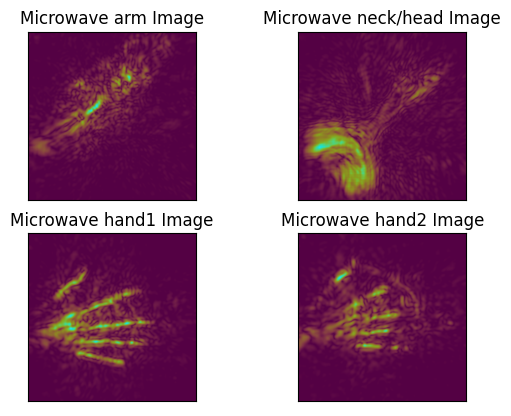

In [2]:
arm = cv2.imread('assets/showcase_images/arm_raw.png')
neck = cv2.imread('assets/showcase_images/neck_head_raw.png')
hand1 = cv2.imread('assets/showcase_images/hand_raw1.png')
hand2 = cv2.imread('assets/showcase_images/hand_raw2.png')

plt.subplot(221),plt.imshow(arm),plt.title('Microwave arm Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(neck,cmap = 'gray'),plt.title('Microwave neck/head Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(hand1),plt.title('Microwave hand1 Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(hand2),plt.title('Microwave hand2 Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Preprocessing

In [4]:
file_path = "./assets/microwave" #input data

for index, element in enumerate(os.listdir(file_path)):
    file = os.path.join(file_path, element)
    image = Image.open(file).convert('LA')

    arr = np.array(image)

    # tresholding, blurring
    arr_new = arr[:,:,0]
    blur = cv2.bilateralFilter(arr_new,30,75,75)
    arr_new[blur<70]=0
    arr_new[arr_new!=0]=255

    #out = morphology.medial_axis(arr_new)
    #out = img_as_ubyte(out)
    arr_new = cv2.resize(arr_new, (640, 480), interpolation = cv2.INTER_AREA)
    #out = cv2.resize(out,(640, 480), interpolation = cv2.INTER_AREA)

    target_path = "./assets/preprocessed_out/"
    image_name = "postprocessed_hand_{}.jpg".format(index)
    #"skeletons" were used in an early implementation to detect finger positions using graph-algorithms
    #skeleton_name = "skeleton_hand_{}.jpg".format(index)

    cv2.imwrite(os.path.join(target_path, image_name), arr_new)
    #cv2.imwrite(os.path.join(target_path, skeleton_name), out)

### Dataset creation
We built our own palm dataset with normal and misaligned fingers (simulating possible injuries) derived from the postprocessed hand data (./assets/preprocessed_out/). We then used this dataset for our PoC on fracture/injury classification.

The misaligned images were produced by ourself, either taking microwave-scans with unusal finger placement or, by manipulating the images using Gimp.

* The misaligned dataset is at ./assets/misaligned/
* The dataset classified as non-injured is the one at ./assets/preprocessed_out/